In [1]:
import pandas as pd
from tensorflow import keras

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

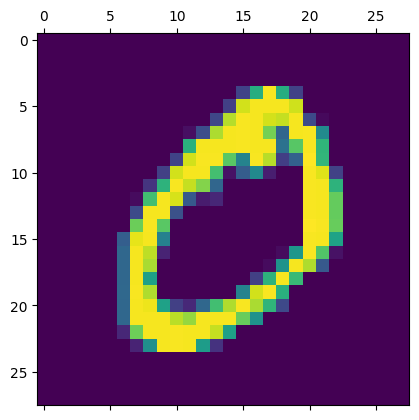

In [5]:
plt.matshow(X_train[1])

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], shape=(60000,), dtype=uint8)

In [7]:
## Normalize pixel values to be between 0 to 1
X_train, X_test = X_train/255.0, X_test/255.0

In [ ]:
## Flattening Manually
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

## Using keras auto flatten layer
# In Sequential:
    # keras.layers.Flatten(input_shape=(28,28))

In [9]:
print(X_train_flattened.shape)
print(X_test_flattened.shape)

(60000, 784)
(10000, 784)


In [ ]:
## No hidden Layer. Just output layer

model = keras.Sequential()
model.add(keras.layers.Dense(10, input_shape=(784,), activation='sigmoid'))


model.compile(optimizer='adam', loss =keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)


c:\Users\roben\Codes\Deep_Learning\tf_env\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8778 - loss: 0.4702
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9146 - loss: 0.3033
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9217 - loss: 0.2831
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9245 - loss: 0.2728
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9262 - loss: 0.2664


In [12]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9271 - loss: 0.2676


[0.2675839066505432, 0.9271000027656555]

In [15]:
y_predicted = model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step


In [13]:
from tensorflow import math

In [16]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [18]:
cm = math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    2,    1,    0,    4,    7,    3,    1,    0],
       [   0, 1115,    4,    1,    0,    1,    4,    2,    8,    0],
       [   4,    9,  941,   15,    8,    2,   13,   11,   27,    2],
       [   3,    0,   26,  919,    1,   19,    4,   10,   19,    9],
       [   2,    2,    8,    0,  917,    0,    9,    5,    8,   31],
       [  10,    3,    4,   35,   10,  760,   23,    9,   32,    6],
       [  10,    3,    8,    1,    7,    6,  920,    2,    1,    0],
       [   1,    5,   27,    5,    7,    0,    0,  952,    2,   29],
       [   8,    9,    9,   18,    9,   22,   11,   13,  870,    5],
       [  11,    7,    1,   10,   29,    5,    0,   24,    7,  915]],
      dtype=int32)>

In [19]:
import seaborn as sns

Text(95.72222222222221, 0.5, 'Truth')

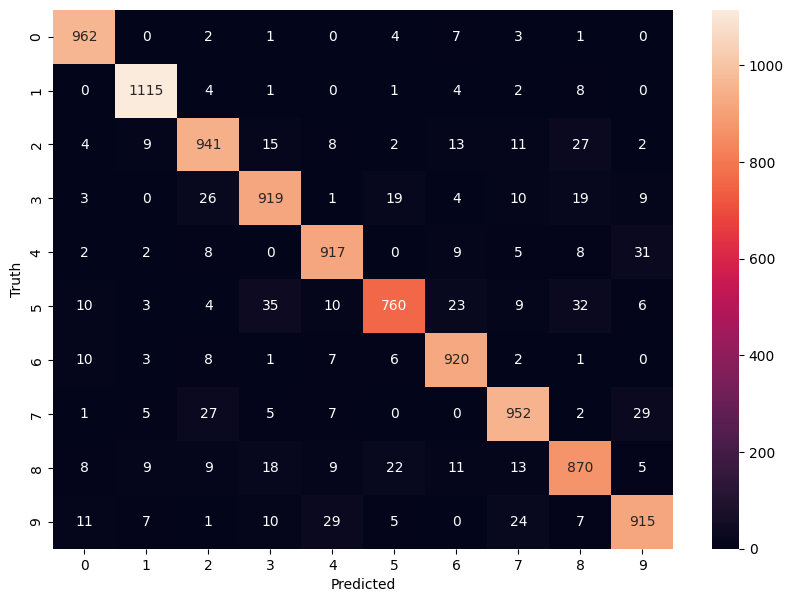

In [20]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [21]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, input_shape=(784,), activation='relu'))
model.add(keras.layers.Dense(10, activation='sigmoid'))


model.compile(optimizer='adam', loss =keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

c:\Users\roben\Codes\Deep_Learning\tf_env\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9189 - loss: 0.2805
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9629 - loss: 0.1281
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9729 - loss: 0.0892
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9794 - loss: 0.0667
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9838 - loss: 0.0522


In [22]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [23]:
cm = math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    1,    0,    0,    2,    0,    1,    0,    3,    2],
       [   0, 1117,    2,    4,    0,    2,    2,    0,    7,    1],
       [   5,    0, 1001,    9,    2,    0,    1,    3,   11,    0],
       [   0,    0,    0,  992,    0,    2,    0,    4,    6,    6],
       [   1,    0,    5,    0,  954,    0,    3,    4,    1,   14],
       [   3,    0,    0,   19,    1,  854,    2,    0,    8,    5],
       [   6,    3,    0,    1,    4,    8,  932,    0,    4,    0],
       [   0,    4,   12,    2,    2,    0,    0,  998,    3,    7],
       [   2,    0,    3,    3,    3,    3,    0,    4,  950,    6],
       [   2,    2,    0,    9,    3,    1,    1,    3,    0,  988]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

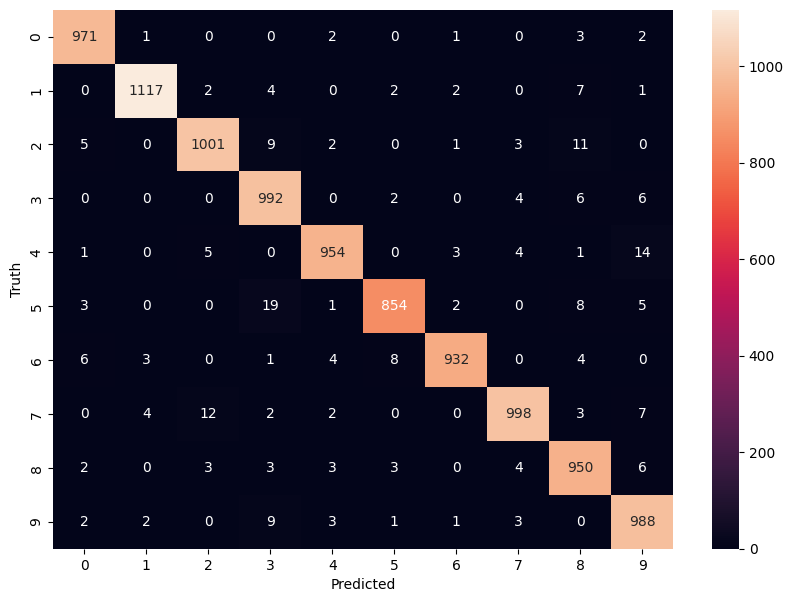

In [24]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')